### Collaborative filtering recommendations using fastai library

A simple Collaborative filtering approach to the Analytics Vidhya recommendations practice challenge that was hosted [here](https://datahack.analyticsvidhya.com/contest/practice-problem-recommendation-engine/).

These are essentially problem recommendations for programmers on a generic programming contest platform depending on their history of problems solved, and programmers similar to them.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

In [2]:
path = 'data/av-recommendations/'

In [3]:
attempts = pd.read_csv(path + 'train_submissions.csv')
attempts.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [4]:
problems = pd.read_csv(path+'problem_data.csv')
problems.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


Let's have a look at how the collab filter matrix would look...

In [5]:
g = attempts.groupby('user_id')['attempts_range'].count()
top_users = g.sort_values(ascending=False)[:15]

g = attempts.groupby('problem_id')['attempts_range'].count()
top_problems = g.sort_values(ascending=False)[:15]

top_a = attempts.join(top_users, rsuffix='_r', how='inner', on='user_id')
top_a = top_a.join(top_problems, rsuffix='_r', how='inner', on='problem_id')

pd.crosstab(top_a.user_id, top_a.problem_id, top_a.attempts_range, aggfunc=np.sum)

problem_id,prob_127,prob_137,prob_1625,prob_164,prob_1675,prob_2605,prob_3038,prob_3204,prob_334,prob_5071,prob_5206,prob_522,prob_5729,prob_5781,prob_6266
user_id,,,,,,,,,,,,,,,
user_1009,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0
user_1151,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0
user_1172,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
user_1232,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user_1406,NaN,1.0,1.0,NaN,3.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
user_2302,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
user_2698,NaN,1.0,NaN,2.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
user_2744,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
user_28,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0


## Collaborative filtering

In [6]:
val_idxs = get_cv_idxs(len(attempts))
wd = 2e-4
n_factors = 50

In [7]:
cf = CollabFilterDataset.from_csv(path, 'train_submissions.csv', 'user_id', 'problem_id', 'attempts_range')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [8]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      1.090571   1.070707  
    1      0.966768   1.005193                                 
    2      0.965261   1.000077                                 



[1.0000767]

In [10]:
math.sqrt(1.0000767)

1.000038349264667

In [11]:
preds = learn.predict()

/home/bharadwaj/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


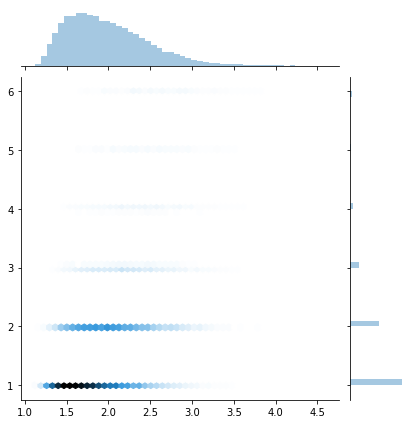

In [12]:
y = learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

## Analyze results

### Problem bias

In [17]:
problem_names = problems.problem_id.to_dict()
g = attempts.groupby('problem_id')['attempts_range'].count()
top_problems = g.sort_values(ascending=False).index.values[:3000]
top_problems_ids = np.array([cf.item2idx[o] for o in top_problems])

In [18]:
m = learn.model;

In [20]:
problem_bias = to_np(m.ib(V(top_problems_ids)))

In [21]:
problem_bias

array([[-1.46837],
       [-0.1803 ],
       [-2.49757],
       ...,
       [-0.09442],
       [ 0.35231],
       [-0.31397]], dtype=float32)

## Collab filtering from scratch

### Dot product example

In [29]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b

(
  1  2
  3  4
 [torch.FloatTensor of size 2x2], 
   2   2
  10  10
 [torch.FloatTensor of size 2x2])

In [30]:
a*b


  2   4
 30  40
[torch.FloatTensor of size 2x2]

In [31]:
(a*b).sum(1)


  6
 70
[torch.FloatTensor of size 2]

In [32]:
class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

In [33]:
model=DotProduct()

In [34]:
model(a,b)


  6
 70
[torch.FloatTensor of size 2]

### Dot product model

In [37]:
u_uniq = attempts.user_id.unique()
user_to_index = {o:i for i,o in enumerate(u_uniq)}
attempts.user_id = attempts.user_id.apply(lambda x: user_to_index[x])

p_uniq = attempts.problem_id.unique()
problem_to_index = {o:i for i,o in enumerate(p_uniq)}
attempts.problem_id = attempts.problem_id.apply(lambda x: problem_to_index[x])

n_users = int(attempts.user_id.nunique())
n_problems = int(attempts.problem_id.nunique())

In [38]:
attempts.head()

,user_id,problem_id,attempts_range
0,0,0,1
1,1,1,3
2,2,2,1
3,3,3,1
4,4,4,1


In [40]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_problems):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_problems, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
    def forward(self, cats, conts):
        users, problems = cats[:,0], cats[:,1]
        u,m = self.u(users), self.m(problems)
        return (u * m).sum(1)

In [42]:
x = attempts.drop(['attempts_range'],axis=1)
y = attempts['attempts_range'].astype(np.float32)

In [43]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['user_id', 'problem_id'], 64)

In [44]:
wd = 1e-5
model = EmbeddingDot(n_users, n_problems) # .cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [45]:
fit(model, data, 3, opt, F.mse_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      1.671233   1.586197  
    1      1.185177   1.225539                                 
    2      1.10514    1.123193                                 



[1.1231929]

In [46]:
set_lrs(opt, 0.01)

In [47]:
fit(model, data, 3, opt, F.mse_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                  
    0      0.970112   1.103864  
    1      0.922044   1.093879                                  
    2      0.990259   1.086621                                  



[1.0866206]

### Bias

In [56]:
min_attempts, max_attempts = float(attempts.attempts_range.min()), float(attempts.attempts_range.max())
min_attempts, max_attempts

(1.0, 6.0)

In [57]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_problems):
        super().__init__()
        (self.u, self.m, self.ub, self.pb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_problems, n_factors), (n_users,1), (n_problems,1)
        ]]
        
    def forward(self, cats, conts):
        users, problems = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(problems)).sum(1)
        res = um + self.ub(users).squeeze() + self.pb(problems).squeeze()
        res = F.sigmoid(res) * (max_attempts - min_attempts) + min_attempts
        return res

In [58]:
wd = 2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items) # .cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [59]:
fit(model, data, 3, opt, F.mse_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                  
    0      1.060784   1.042225  
    1      0.979645   1.00789                                   
    2      1.00717    0.997433                                  



[0.9974331]

In [60]:
set_lrs(opt, 1e-2)

In [61]:
fit(model, data, 3, opt, F.mse_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                  
    0      0.902994   0.996113  
    1      0.932033   0.995652                                  
    2      0.935261   0.995585                                  



[0.9955846]

### Mini net

In [62]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_problems, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_problems, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users, problems = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(problems)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_attempts - min_attempts + 1) + min_attempts - 0.5

In [63]:
wd = 1e-5
model = EmbeddingNet(n_users, n_problems) # .cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [64]:
fit(model, data, 3, opt, F.mse_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      1.020472   0.940042  
    1      0.985517   0.926756                                 
    2      0.963273   0.92609                                  



[0.9260903]

In [65]:
set_lrs(opt, 1e-3)

In [66]:
fit(model, data, 3, opt, F.mse_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      0.934755   0.923336  
    1      0.886527   0.930854                                 
    2      0.863752   0.930998                                 



[0.93099785]

### predictions

In [79]:
model

EmbeddingNet(
  (u): Embedding(3529, 50)
  (m): Embedding(5776, 50)
  (lin1): Linear(in_features=100, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.05)
  (drop2): Dropout(p=0.5)
)

In [82]:
test = pd.read_csv(path + 'test_submissions.csv')
test.head()

,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139


In [127]:
sample = pd.read_csv(path + 'sample_submissions.csv')
sample.head()

,ID,attempts_range


In [128]:
sample.ID = test.ID

In [129]:
sample['user_prob'] = test['user_id'] + '!'+ test['problem_id']

In [130]:
sample.head()

,ID,attempts_range,user_prob
0,user_856_prob_5822,NaN,user_856!prob_5822
1,user_2642_prob_2334,NaN,user_2642!prob_2334
2,user_2557_prob_2920,NaN,user_2557!prob_2920
3,user_1572_prob_4598,NaN,user_1572!prob_4598
4,user_295_prob_6139,NaN,user_295!prob_6139


In [147]:
def get_rating(user_prob):
    user, prob = user_prob.split('!')
    try:
        user_id = user_to_index[user]
    except KeyError:
        try:
            pid = problem_to_index[prob]
            return np.median(attempts[attempts['problem_id']==pid].attempts_range)
        except KeyError:
            return None
    problem_id = problem_to_index[prob]
    u_emb = to_np(model.u.weight[user_id, :])
    p_emb = to_np(model.m.weight[problem_id, :])
    return np.dot(u_emb, p_emb.T)

In [148]:
sample.attempts_range = sample.user_prob.apply(lambda x: get_rating(x))

In [149]:
sample.head()

,ID,attempts_range,user_prob
0,user_856_prob_5822,1.5,user_856!prob_5822
1,user_2642_prob_2334,1.0,user_2642!prob_2334
2,user_2557_prob_2920,1.0,user_2557!prob_2920
3,user_1572_prob_4598,2.0,user_1572!prob_4598
4,user_295_prob_6139,2.0,user_295!prob_6139


In [152]:
attempt_median = np.median(attempts.attempts_range)

In [153]:
attempt_median

1.0

In [155]:
sample.attempts_range = sample.attempts_range.fillna(attempt_median)

In [157]:
sample.attempts_range = sample.attempts_range.apply(lambda x: int(x))

In [160]:
sample.drop(columns=['user_prob'], inplace=True)

In [161]:
sample.head()

,ID,attempts_range
0,user_856_prob_5822,1
1,user_2642_prob_2334,1
2,user_2557_prob_2920,1
3,user_1572_prob_4598,2
4,user_295_prob_6139,2


In [162]:
sample.to_csv('submission.csv', index=False)

This submissions will get a public Leaderboard score of 0.5080412095, and put me at no. 3 spot for first submission. Not bad eh? ;)